# Decision Tree Regression

Decision Trees are supervised learning models used for both classification and regression tasks. 

In **Decision Tree Regression**, the algorithm splits the data into smaller regions using decision rules based on input features to predict a continuous value.

## Basic Components of Decision Tree Algorithms

A **Decision Tree** is a flowchart-like structure used for decision-making and prediction. It splits the dataset into smaller subsets based on feature values to reach a prediction.

In the context of **regression**, the decision tree predicts continuous numerical values.

---

### 1. Root Node
- The topmost node in the tree.
- Represents the entire dataset.
- Splits the data based on the feature that best minimizes the prediction error (e.g., using MSE).

---

### 2. Internal Nodes
- Nodes that represent tests or decisions based on input features.
- Each internal node splits the dataset into two or more subsets.
- Example: `MedInc <= 3.5`

---

### 3. Leaf Nodes (Terminal Nodes)
- Nodes that do not split further.
- Represent the final output or prediction.
- In regression trees, the prediction is the **mean** of the target values in that node.

---

### 4. Splitting Criteria (For Regression)

Used to determine how the data is split at each node. The goal is to reduce the error in predicting the target variable.

**Common criteria:**
- **Mean Squared Error (MSE):**
  
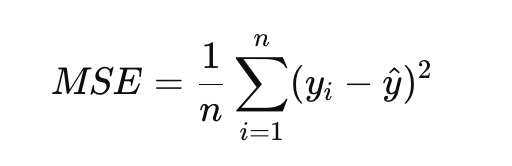

The tree chooses the feature and threshold that minimize the MSE of the resulting subsets.

---

### 5. Recursive Partitioning
- The process of splitting nodes repeatedly.
- At each step, the best split is chosen based on the splitting criterion.
- This continues until a stopping condition is met (e.g., max depth or minimum number of samples).

---

### 6. Stopping Criteria / Pruning Parameters

These help prevent the tree from overfitting to the training data by limiting its complexity.

**Common parameters:**
- `max_depth`: Maximum depth of the tree.
- `min_samples_split`: Minimum number of samples required to split an internal node.
- `min_samples_leaf`: Minimum number of samples required to be at a leaf node.
- `max_leaf_nodes`: Maximum number of leaf nodes allowed.

These parameters help control model complexity and improve generalization.

---

### 7. Prediction Process

Once the tree is trained:

- A new data point is passed through the tree.
- At each node, a decision is made based on the input features.
- The process continues down the branches until a leaf node is reached.
- The prediction is the mean value of the target variable in that leaf.

---

### Summary Table

| Component           | Description |
|---------------------|-------------|
| **Root Node**       | First node that splits the entire dataset |
| **Internal Nodes**  | Nodes where decisions are made to split data |
| **Leaf Nodes**      | End nodes that make the final prediction |
| **Splitting Criteria** | Metric to determine best feature split (e.g., MSE) |
| **Recursive Partitioning** | Repeated splitting of data |
| **Stopping Criteria** | Limits tree growth to prevent overfitting |
| **Prediction**      | Traverse the tree to reach a leaf and output the mean target |

---

### Example

Suppose we are predicting house prices:

1. Root node splits based on `MedInc <= 4.5`.
2. If true → go to left subtree (lower-income areas).
3. If false → go to right subtree (higher-income areas).
4. Continue splitting by other features such as `HouseAge`, `AveRooms`, etc.
5. At a leaf node, the predicted value is the average house price of the samples in that region.


### Advantages:
- Easy to understand and visualize.
- Non-linear relationships between parameters do not affect tree performance.
- Requires little data preprocessing.

### Disadvantages:
- Prone to **overfitting**, especially with deep trees.
- Sensitive to small data changes.

We will explore how Decision Tree Regression works using the California Housing dataset available in Scikit-learn.


In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn modules
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Set default Seaborn theme for plots
sns.set_theme()

# Load the California housing dataset
california = fetch_california_housing(as_frame=True)
df = california.frame

# Display first few rows
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


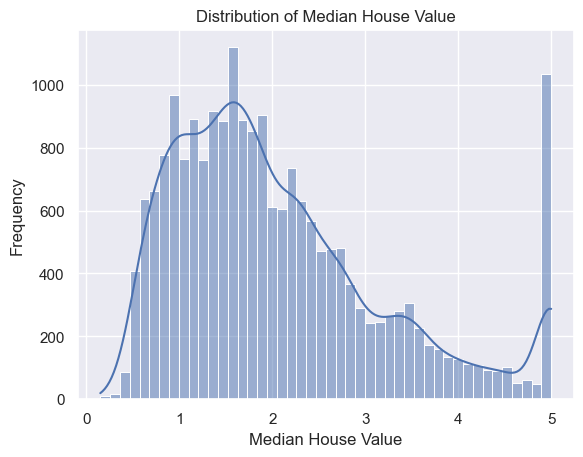

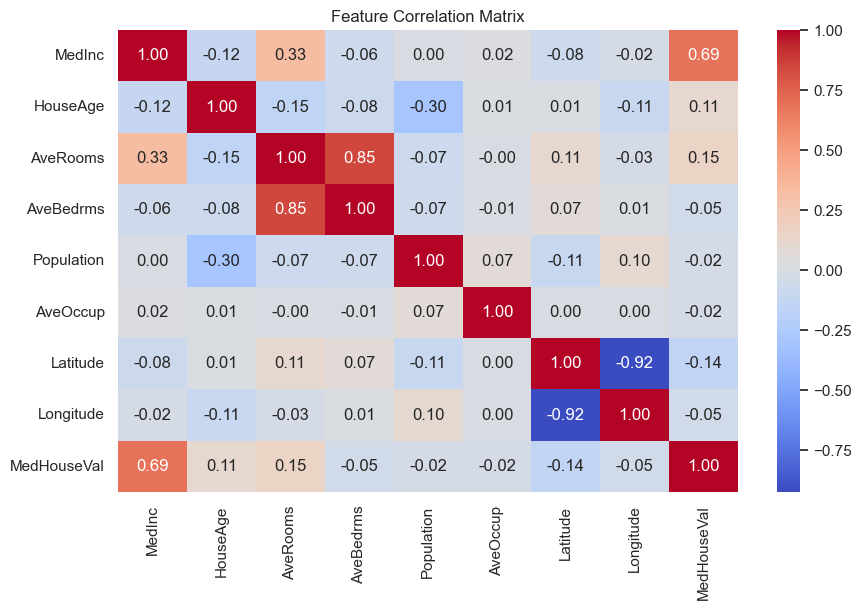

In [2]:
# Basic info
df.info()

# Basic statistics
df.describe()

# Target variable distribution
sns.histplot(df['MedHouseVal'], kde=True)
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Matrix")
plt.show()


In [3]:
# Define features and target
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

# Split data into training and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check shape of training and test sets
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


Training set size: (16512, 8)
Test set size: (4128, 8)


In [4]:
# Initialize the Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)

# Fit the model on training data
dt_model.fit(X_train, y_train)

# Predict on test set
y_pred = dt_model.predict(X_test)


In [5]:
# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Squared Error (MSE): 0.4997
R² Score: 0.6187


### Interpretation:
- **MSE (Mean Squared Error):** Lower is better; it indicates how far the predictions are from actual values.
- **R² Score:** Indicates how well the model explains the variability in the data. Ranges from 0 to 1. Closer to 1 is better.


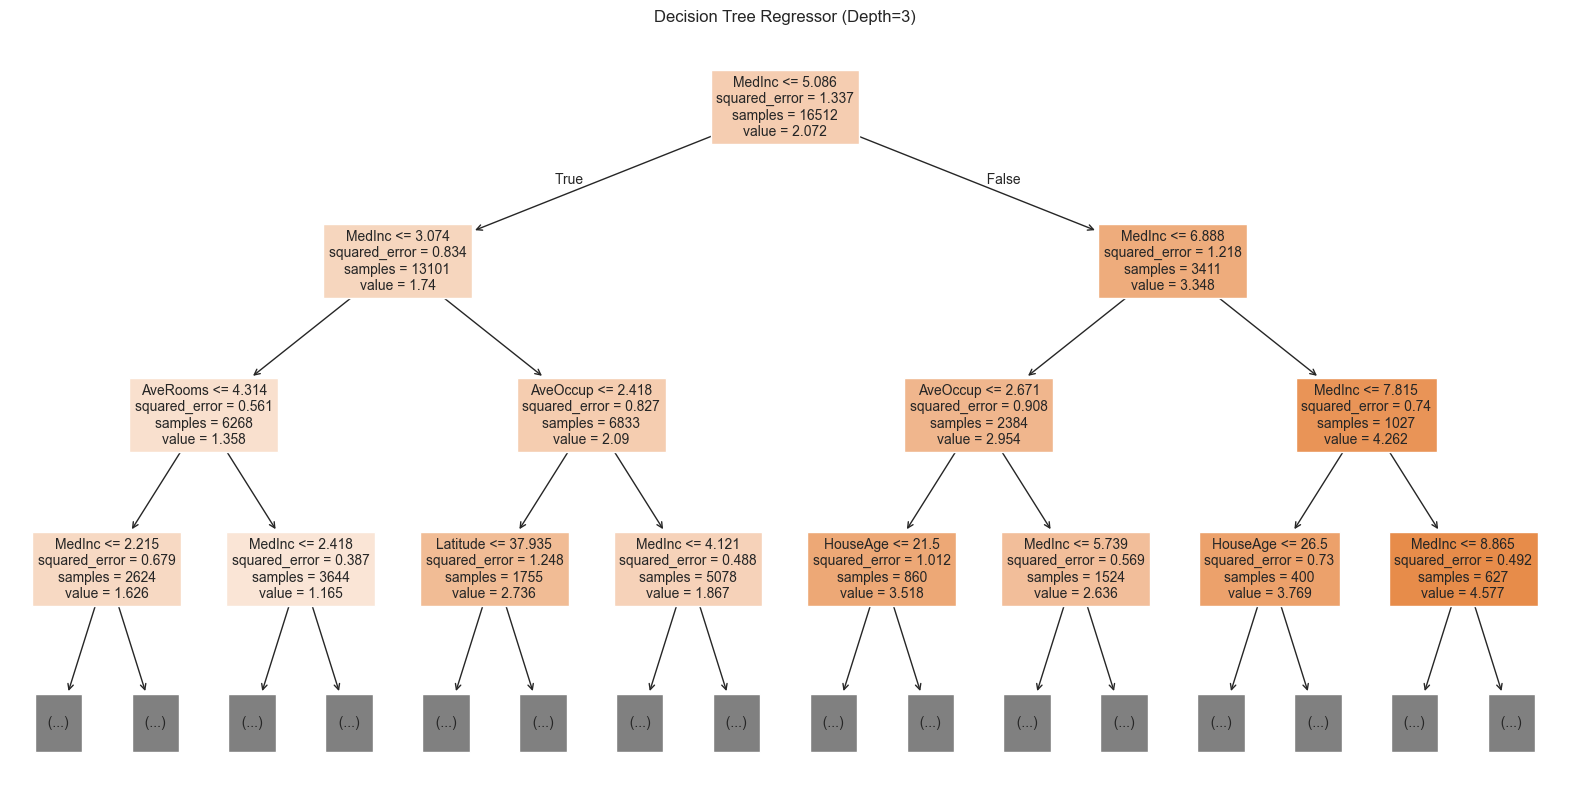

In [6]:
# Visualize the tree (limit depth for readability)
plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=X.columns, filled=True, max_depth=3, fontsize=10)
plt.title("Decision Tree Regressor (Depth=3)")
plt.show()


In [7]:
# Control tree complexity with hyperparameters
tuned_model = DecisionTreeRegressor(max_depth=6, min_samples_split=10, random_state=42)
tuned_model.fit(X_train, y_train)
y_tuned_pred = tuned_model.predict(X_test)

# Evaluate again
tuned_mse = mean_squared_error(y_test, y_tuned_pred)
tuned_r2 = r2_score(y_test, y_tuned_pred)

print(f"Tuned MSE: {tuned_mse:.4f}")
print(f"Tuned R² Score: {tuned_r2:.4f}")


Tuned MSE: 0.4973
Tuned R² Score: 0.6205


### Common Hyperparameters:
- `max_depth`: Maximum depth of the tree.
- `min_samples_split`: Minimum samples required to split an internal node.
- `min_samples_leaf`: Minimum samples required to be at a leaf node.

These help **control overfitting** and improve generalization.
